In [1]:
from rdkit.Chem import AllChem, DataStructs
from rdkit import Chem

The following block computes the fingerprints for all the compounts that have SMILES and saves them to a new file.

We need a separate script as rdkit and chembl API cannot run on the same verion of python... 

In [2]:
# now we create a new file with the fingerprints.
with open('Compound_Fingerprints_FCFP.tab','w') as newf:
    with open('Compound_SMILES.tab') as oldf:
#         header = oldf.readline()
#         newf.write("Compound-ID\tSMILES\tFingerprint\n")q
        for line in oldf:
            tokens = line.split() # [Comp-ID, SMILES]
#             if tokens[1] is None:
#                 fp="None"
#             else:
            if Chem.MolFromSmiles(tokens[1]):
                fp = AllChem.GetMorganFingerprintAsBitVect( Chem.MolFromSmiles(tokens[1]), radius=2, useFeatures=True )
                fp = fp.ToBitString()
            else:
                fp = "NOFP" 
            newf.write(tokens[0]+'\t'+tokens[1]+'\t' + fp + '\n')

In [10]:
if Chem.MolFromSmiles('c1cccc2c3ccccc3[I+]c12'):
# if Chem.MolFromSmiles('c1ccc2c(c1)[i+]c3ccccc23'):
    print("nice")
else:
    print(1)

1


In [ ]:
from rdkit.Chem import Draw
Draw.MolToFile( Chem.MolFromSmiles('c1cccc2c3ccccc3[I+]c12'), 'mol.png' )

In [ ]:
# For that reason, we calculate FP for all the available compounds, probably 2x more than what we will be using.

# first we create a CompID-SMILES index for all the available compounds previously fetched
Compounds = dict()
with open("interactions_kinases_all.tab", 'r') as file:
    first_line = file.readline()
    for line in file:
        tokens = line.split()
        Compounds[tokens[1]] = tokens[4]

for cid in Compounds:
    smi=Compounds[cid]
    fp =AllChem.GetMorganFingerprintAsBitVect( Chem.MolFromSmiles(smi), radius=2 )
    newf.write( cid+"\t"+smi+"\t"+fp.ToBitString()+"\n" )
newf.close()

In [ ]:
with open('Compound_Features_37095.tab','r') as f:
    header=f.readline()
    mol1 = f.readline().split()
    mol2 = f.readline().split()
print(mol1)

In [ ]:
from rdkit.Chem.Fingerprints import FingerprintMols
ms = [Chem.MolFromSmiles(mol1[1]), Chem.MolFromSmiles(mol2[1])]
fps = [FingerprintMols.FingerprintMol(x) for x in ms]

In [ ]:
DataStructs.FingerprintSimilarity(fps[0],fps[1]) # tanimoto is by default

In [ ]:
tani = DataStructs.TanimotoSimilarity(fps[0],fps[1])
print(tani)

In [ ]:
x1 = FingerprintMols.GetRDKFingerprint(ms[0])
x2 = FingerprintMols.FingerprintMol(ms[0])
x4 = AllChem.GetMorganFingerprint(ms[0],radius=2)

In [ ]:
bin( int(mol1[2],16))

In [ ]:
x3 = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(mol1[1]),radius=2)
bitstr = x3.ToBitString()
format(bitstr)

In [ ]:
x4.GetLength()

In [ ]:
DataStructs.TanimotoSimilarity( FingerprintMols.FingerprintMol(ms[0]),FingerprintMols.FingerprintMol(ms[1]))

In [ ]:
DataStructs.TanimotoSimilarity(AllChem.GetMorganFingerprint(ms[0], radius=2),AllChem.GetMorganFingerprint(ms[1], radius=2) )

In [ ]:
DataStructs.TanimotoSimilarity(AllChem.GetMorganFingerprintAsBitVect(ms[0], radius=2),AllChem.GetMorganFingerprintAsBitVect(ms[1], radius=2) )

In [5]:
nice = [458, 1747, 361, 1524, 1522, 184, 352, 1313, 1114, 140, 328, 489, 211, 1155, 133, 306, 555, 202, 25, 1842]
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D

Smiles = {}
with open('Compound_SMILES.tab', 'r') as f:
    for line in f:
        tokens = line.split()
        Smiles[tokens[0]] = tokens[1]

In [50]:
bi

{13: ((2, 1),),
 43: ((13, 1),),
 80: ((2, 0), (3, 0)),
 217: ((12, 2),),
 304: ((3, 2),),
 378: ((13, 0),),
 486: ((18, 1), (1, 2)),
 509: ((13, 2),),
 539: ((16, 2),),
 650: ((5, 0), (19, 0)),
 652: ((7, 2), (11, 2)),
 656: ((14, 2),),
 695: ((1, 0),),
 755: ((16, 1),),
 757: ((9, 2),),
 760: ((6, 2),),
 805: ((20, 2),),
 807: ((4, 0), (18, 0)),
 841: ((0, 1),),
 847: ((8, 2), (10, 2), (18, 2)),
 926: ((7, 0), (8, 0), (10, 0), (11, 0)),
 927: ((25, 2),),
 935: ((6, 0), (12, 0)),
 996: ((4, 2),),
 1005: ((1, 1),),
 1009: ((4, 1),),
 1019: ((9, 0),),
 1057: ((0, 0), (26, 0)),
 1088: ((22, 1), (23, 1)),
 1152: ((17, 0),),
 1199: ((22, 2), (23, 2)),
 1238: ((15, 2),),
 1325: ((8, 1), (10, 1)),
 1380: ((16, 0), (20, 0), (25, 0)),
 1391: ((25, 1),),
 1447: ((21, 2),),
 1480: ((7, 1), (11, 1)),
 1564: ((3, 1),),
 1584: ((2, 2),),
 1608: ((12, 1),),
 1722: ((26, 1),),
 1750: ((15, 1), (21, 1), (24, 1)),
 1816: ((17, 1),),
 1866: ((14, 1),),
 1873: ((14, 0), (15, 0), (21, 0), (22, 0), (23, 0)

In [66]:
mol = Chem.MolFromSmiles(Smiles[tokens[0]])
bi={}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, bitInfo=bi)
for bit in bi:
    drawer = Draw.DrawMorganBit(mol,bit, bi)
    drawer.MolToImageFile(mol,'mymol.png')

AttributeError: 'PngImageFile' object has no attribute 'MolToImageFile'

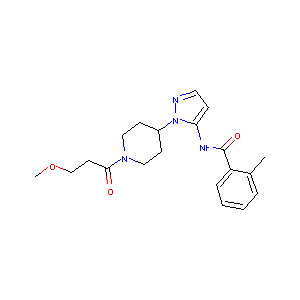

In [58]:
# drawer = Draw.MolToImageFile(mol,'mymol.png')
Draw.MolToImage(mol)

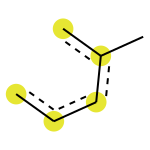

In [72]:
from rdkit.Chem import Draw
mol = Chem.MolFromSmiles('c1ccccc1CC1CC1')
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, bitInfo=bi)
mfp2_svg = Draw.DrawMorganBit(mol,872, bi)
rdkbi = {}
rdkfp = Chem.RDKFingerprint(mol, maxPath=5, bitInfo=rdkbi)
rdkbi[1553]
rdk_svg = Draw.DrawRDKitBit(mol, 1553, rdkbi)
mfp2_svg
rdk_svg

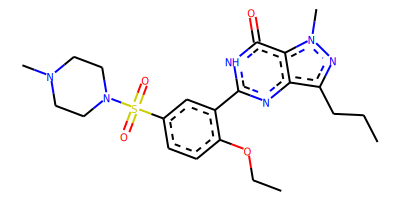

In [62]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
from rdkit import rdBase
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
mol = Chem.MolFromSmiles( "CN1CCN(S(=O)(C2=CC=C(OCC)C(C3=NC4=C(N(C)N=C4CCC)C(N3)=O)=C2)=O)CC1" )
rdDepictor.Compute2DCoords(mol)
drawer = rdMolDraw2D.MolDraw2DSVG(400,200)
drawer.DrawMolecule(mol)
drawer.FinishDrawing()
svg = drawer.GetDrawingText().replace('svg:','')
SVG(svg)

In [64]:
SVG?